   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.0 MB/s eta 0:00:00
Created ChimeraX script at: assignment_1_trethowan/bin/structure_analysis_pipeline.cxc
Created ChimeraX script at: assignment_1_trethowan/bin/make_matrix.sh
Please upload your FASTA file (e.g., sequences.fna) ...


/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Saving sequences.fna to sequences.fna
Uploaded file: sequences.fna
Copied file to: assignment_1_trethowan/data/sequences.fna
You successfully loaded 6 sequences.
  Sequence_ID  Length_bp  Length_kb  GC_Content (%)
0  Sequence_1        852      0.852       55.868545
1  Sequence_2        843      0.843       52.550415
2  Sequence_3       1053      1.053       51.946819
3  Sequence_4       1494      1.494       51.740295
4  Sequence_5        678      0.678       46.755162
5  Sequence_6       1380      1.380       53.260870
Sequence properties saved to: assignment_1_trethowan/results/sequence_properties/properties.csv


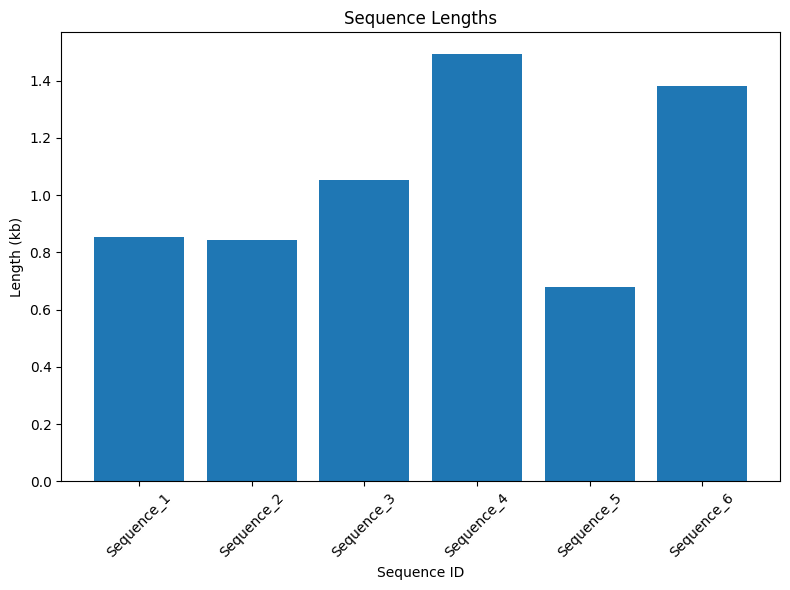

Length plot saved to: assignment_1_trethowan/results/sequence_properties/lengths.png


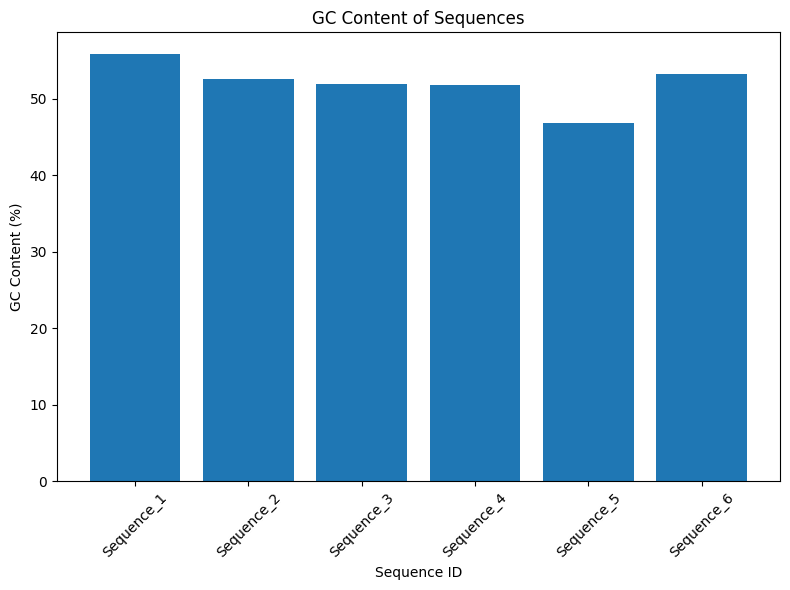

GC content plot saved to: assignment_1_trethowan/results/sequence_properties/gc_content.png
Translated protein sequences saved to: assignment_1_trethowan/results/sequence_properties/sequences_translated.faa
Pairwise similarity CSV saved to: assignment_1_trethowan/results/alignments/sequence_similarities.csv
Nucleotide similarity matrix saved to: assignment_1_trethowan/results/alignments/nucleotide_similarity_matrix.csv
Protein similarity matrix saved to: assignment_1_trethowan/results/alignments/protein_similarity_matrix.csv


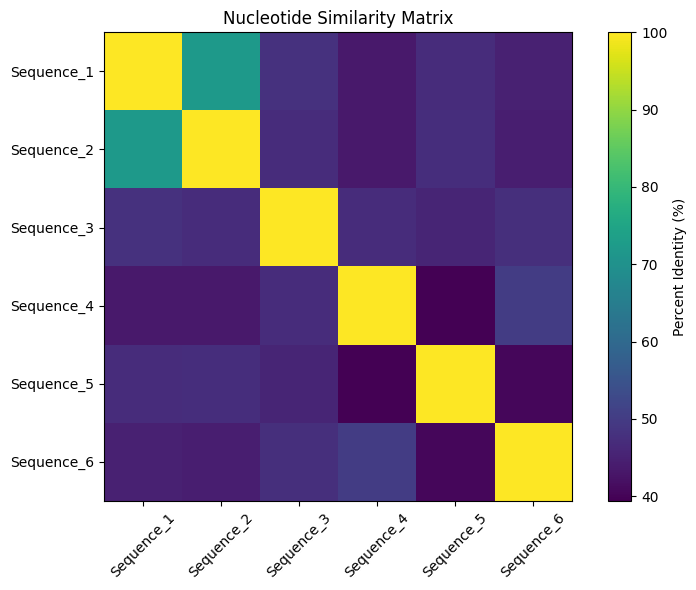

Nucleotide similarity heatmap saved to: assignment_1_trethowan/results/alignments/nucleotide_similarity_heatmap.png


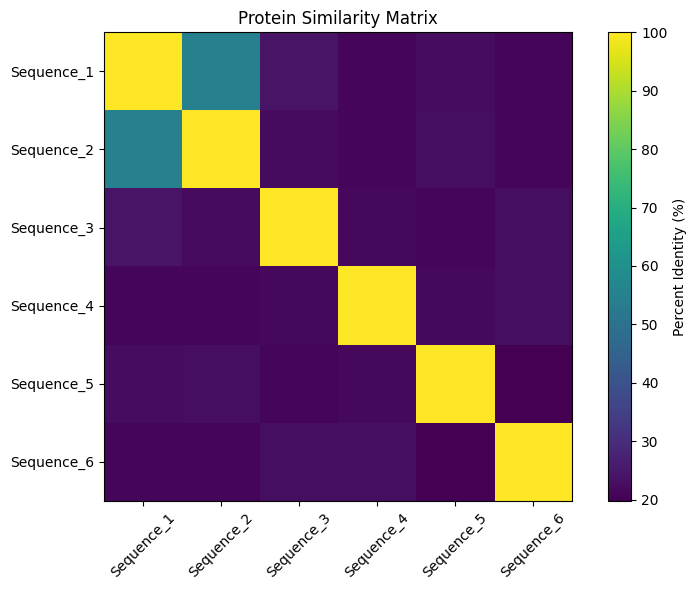

Protein similarity heatmap saved to: assignment_1_trethowan/results/alignments/protein_similarity_heatmap.png
Nucleotide tree (Newick) saved to: assignment_1_trethowan/results/phylogenetic_tree/tree_nucleotides.nwk
Nucleotide tree visualization saved to: assignment_1_trethowan/results/phylogenetic_tree/tree_nucleotides_visualization.png
Protein tree (Newick) saved to: assignment_1_trethowan/results/phylogenetic_tree/tree_proteins.nwk
Protein tree visualization saved to: assignment_1_trethowan/results/phylogenetic_tree/tree_proteins_visualization.png

=== Sequence Analysis Pipeline Completed ===
Running BLAST for Sequence_1 ...
BLAST results saved to assignment_1_trethowan/results/functional_prediction/Sequence_1/Sequence_1_blast.xml
Submitting online HMMER job for Sequence_1 ...
Online HMMER results saved to assignment_1_trethowan/results/functional_prediction/Sequence_1/Sequence_1_hmm_online.xml
Running BLAST for Sequence_2 ...
BLAST results saved to assignment_1_trethowan/results/fun

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [1]:
# %% [code]
# Install required packages
!pip install biopython lxml

import os
import re
import shutil
import subprocess
import time
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Bio import SeqIO, Phylo
from Bio.SeqRecord import SeqRecord
from Bio import pairwise2
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from Bio.Blast import NCBIWWW, NCBIXML
from lxml import etree
from google.colab import files
from google.colab import drive

# ============================================================================
# Setup: Create the directory structure
# ============================================================================
# Change the assignment root name as needed (e.g., assignment_1_last_name)
root_dir = "assignment_1_trethowan"
dirs = {
    "data": os.path.join(root_dir, "data"),
    "folded_proteins": os.path.join(root_dir, "data", "folded_proteins"),
    "bin": os.path.join(root_dir, "bin"),
    "sequence_properties": os.path.join(root_dir, "results", "sequence_properties"),
    "alignments": os.path.join(root_dir, "results", "alignments"),
    "phylogenetic_tree": os.path.join(root_dir, "results", "phylogenetic_tree"),
    "functional_prediction": os.path.join(root_dir, "results", "functional_prediction"),
    "organism_origin": os.path.join(root_dir, "results", "organism_origin"),
    "predicted_structures_visualizations": os.path.join(root_dir, "results", "predicted_structures_visualizations"),
    "structural_homology": os.path.join(root_dir, "results", "structural_homology"),
    "pair_homology": os.path.join(root_dir, "results", "pair_homology")
}
for d in dirs.values():
    os.makedirs(d, exist_ok=True)

# Define the assignment bin directory
bin_dir = os.path.join(root_dir, "bin")
os.makedirs(bin_dir, exist_ok=True)

# ============================================================================
# PART 2: Create the ChimeraX Scripts (Structure Analysis)
# ============================================================================
# The ChimeraX script loads the predicted protein structure files,
# hides other proteins, centers the view on the target model, and saves the image.
# The make_matrix.sh script creates a distance matrix of RMSD values post-creation
# of pairwise structural analyses

cxc_content = """# --- Open the CIF files ---
cd ~
open data/folded_proteins/fold_sequence_1_translated_model_0.cif
open data/folded_proteins/fold_sequence_2_translated_model_0.cif
open data/folded_proteins/fold_sequence_3_translated_model_0.cif
open data/folded_proteins/fold_sequence_4_translated_model_0.cif
open data/folded_proteins/fold_sequence_5_translated_model_0.cif
open data/folded_proteins/fold_sequence_6_translated_model_0.cif

set bgColor white

# --- Save individual structure images ---

# Save image for protein #1
hide #2,3,4,5,6 models
view #1
save results/predicted_structures_visualizations/fold_sequence_1_translated_model_0.png
show #2,3,4,5,6 models

# Save image for protein #2
hide #1,3,4,5,6 models
view #2
save results/predicted_structures_visualizations/fold_sequence_2_translated_model_0.png
show #1,3,4,5,6 models

# Save image for protein #3
hide #1,2,4,5,6 models
view #3
save results/predicted_structures_visualizations/fold_sequence_3_translated_model_0.png
show #1,2,4,5,6 models

# Save image for protein #4
hide #1,2,3,5,6 models
view #4
save results/predicted_structures_visualizations/fold_sequence_4_translated_model_0.png
show #1,2,3,5,6 models

# Save image for protein #5
hide #1,2,3,4,6 models
view #5
save results/predicted_structures_visualizations/fold_sequence_5_translated_model_0.png
show #1,2,3,4,6 models

# Save image for protein #6
hide #1,2,3,4,5 models
view #6
save results/predicted_structures_visualizations/fold_sequence_6_translated_model_0.png
show #1,2,3,4,5 models


# --- Run Foldseek analysis for each model ---
# Save outputs into the relative results folder.
foldseek #1 saveDirectory results/ wait true
foldseek #2 saveDirectory results/ wait true
foldseek #3 saveDirectory results/ wait true
foldseek #4 saveDirectory results/ wait true
foldseek #5 saveDirectory results/ wait true
foldseek #6 saveDirectory results/ wait true

# --- Align all models and generate pairwise structural alignments ---
# For each pair, hide non-pair models, align, center view, and save PNG image.

# Pair 1-2
hide #3,4,5,6 models
matchmaker #1 to #2
view #1-2
save results/pair_homology/pair_1_2.png
log save results/mm_scores_1-2.html
show #3,4,5,6 models

# Pair 1-3
hide #2,4,5,6 models
matchmaker #1 to #3
view #1-3
save results/pair_homology/pair_1_3.png
log save results/mm_scores_1-3.html
show #2,4,5,6 models

# Pair 1-4
hide #2,3,5,6 models
matchmaker #1 to #4
view #1-4
save results/pair_homology/pair_1_4.png
log save results/mm_scores_1-4.html
show #2,3,5,6 models

# Pair 1-5
hide #2,3,4,6 models
matchmaker #1 to #5
view #1-5
save results/pair_homology/pair_1_5.png
log save results/mm_scores_1-5.html
show #2,3,4,6 models

# Pair 1-6
hide #2,3,4,5 models
matchmaker #1 to #6
view #1-6
save results/pair_homology/pair_1_6.png
log save results/mm_scores_1-6.html
show #2,3,4,5 models

# Pair 2-3
hide #1,4,5,6 models
matchmaker #2 to #3
view #2-3
save results/pair_homology/pair_2_3.png
log save results/mm_scores_2-3.html
show #1,4,5,6 models

# Pair 2-4
hide #1,3,5,6 models
matchmaker #2 to #4
view #2-4
save results/pair_homology/pair_2_4.png
log save results/mm_scores_2-4.html
show #1,3,5,6 models

# Pair 2-5
hide #1,3,4,6 models
matchmaker #2 to #5
view #2-5
save results/pair_homology/pair_2-5.png
log save results/mm_scores_2-5.html
show #1,3,4,6 models

# Pair 2-6
hide #1,3,4,5 models
matchmaker #2 to #6
view #2-6
save results/pair_homology/pair_2_6.png
log save results/mm_scores_2-6.html
show #1,3,4,5 models

# Pair 3-4
hide #1,2,5,6 models
matchmaker #3 to #4
view #3-4
save results/pair_homology/pair_3_4.png
log save results/mm_scores_3-4.html
show #1,2,5,6 models

# Pair 3-5
hide #1,2,4,6 models
matchmaker #3 to #5
view #3-5
save results/pair_homology/pair_3_5.png
log save results/mm_scores_3-5.html
show #1,2,4,6 models

# Pair 3-6
hide #1,2,4,5 models
matchmaker #3 to #6
view #3-6
save results/pair_homology/pair_3_6.png
log save results/mm_scores_3-6.html
show #1,2,4,5 models

# Pair 4-5
hide #1,2,3,6 models
matchmaker #4 to #5
view #4-5
save results/pair_homology/pair_4_5.png
log save results/mm_scores_4-5.html
show #1,2,3,6 models

# Pair 4-6
hide #1,2,3,5 models
matchmaker #4 to #6
view #4-6
save results/pair_homology/pair_4_6.png
log save results/mm_scores_4-6.html
show #1,2,3,5 models

# Pair 5-6
hide #1,2,3,4 models
matchmaker #5 to #6
view #5-6
save results/pair_homology/pair_5_6.png
log save results/mm_scores_5-6.html
show #1,2,3,4 models

# --- End of pairwise analysis ---
"""

# Write the ChimeraX script file to the bin folder

cxc_file_path = os.path.join(bin_dir, "structure_analysis_pipeline.cxc")
with open(cxc_file_path, "w") as f:
    f.write(cxc_content)
print("Created ChimeraX script at:", cxc_file_path)

matrix_content = """
#!/bin/bash
# make_matrix.sh
# This script generates a CSV distance matrix from HTML files in ~/results.
# Each file (mm_scores_i-j.html) is expected to contain lines like:
#
#   Matchmaker fold_sequence_3_translated_model_0.cif, chain A (#3) with fold_sequence_1_translated_model_0.cif, chain A (#1), sequence alignment score = 97.8
#   RMSD between 20 pruned atom pairs is 1.169 angstroms; (across all 239 pairs: 27.648)
#
# Because each file may contain multiple RMSD values, extract only the LAST occurrence.

output="pair_homology_predictions.csv"

{
  # Print header row: blank first cell then protein labels 1..6
  header=","
  for j in {1..6}; do
    header+="$j"
    [ "$j" -ne 6 ] && header+=","
  done
  echo "$header"

  # Loop over rows (proteins 1..6)
  for i in {1..6}; do
    # Start the row with the protein label
    line="$i"
    for j in {1..6}; do
      line+=","
      if [ "$i" -eq "$j" ]; then
        # Diagonal: same protein → RMSD = 0
        line+="0"
      else
        # Choose the correct file: use mm_scores_i-j.html if i < j; otherwise mm_scores_j-i.html.
        if [ "$i" -lt "$j" ]; then
          file=~/results/mm_scores_"$i"-"$j".html
        else
          file=~/results/mm_scores_"$j"-"$i".html
        fi

        if [ -f "$file" ]; then
          # Extract the RMSD value from the LAST matching line.
          # The regex matches:
          #   RMSD between [number] pruned atom pairs is [value] angstroms;
          # and captures the [value].
          val=$(sed -E -n 's/.*RMSD between [0-9]+ pruned atom pairs is ([0-9]+(\.[0-9]+)?) angstroms;.*/\1/p' "$file" | tail -n 1)
          if [ -z "$val" ]; then
            val="NA"
          fi
        else
          val="NA"
        fi
        line+="$val"
      fi
    done
    echo "$line"
  done
} > "$output"

echo "CSV matrix created in $output"
"""

# Write the matrix script file to the bin folder

matrix_file_path = os.path.join(bin_dir, "make_matrix.sh")
with open(matrix_file_path, "w") as f:
    f.write(matrix_content)
print("Created ChimeraX script at:", matrix_file_path)

# ============================================================================
# PART 1: Sequence Analysis Pipeline
# ============================================================================
# --- Step 1: Upload and store sequences file ---
print("Please upload your FASTA file (e.g., sequences.fna) ...")
uploaded = files.upload()  # Interactive file upload for FASTA file
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

# Move the uploaded file to the data/ folder.
data_file = os.path.join(dirs["data"], "sequences.fna")
shutil.copy(filename, data_file)
print(f"Copied file to: {data_file}")

# --- Step 2: Load sequences and compute basic properties ---
records = list(SeqIO.parse(data_file, "fasta"))
print(f"You successfully loaded {len(records)} sequences.")

def compute_gc(seq):
    """Compute GC content percentage."""
    seq = seq.upper()
    return 100 * (seq.count("G") + seq.count("C")) / len(seq) if len(seq) > 0 else 0

data_props = []
protein_records = []
for record in records:
    seq_str = str(record.seq)
    length_bp = len(seq_str)
    gc_content = compute_gc(seq_str)
    # Translate (stop at the first stop codon)
    protein_seq = record.seq.translate(to_stop=True)
    protein_records.append(SeqRecord(protein_seq, id=record.id, description="Translated sequence"))
    data_props.append({
        "Sequence_ID": record.id,
        "Length_bp": length_bp,
        "Length_kb": length_bp/1000,
        "GC_Content (%)": gc_content
    })

df_props = pd.DataFrame(data_props)
print(df_props)

# Save sequence properties.
props_csv = os.path.join(dirs["sequence_properties"], "properties.csv")
df_props.to_csv(props_csv, index=False)
print(f"Sequence properties saved to: {props_csv}")

# Plot and save sequence lengths.
plt.figure(figsize=(8,6))
plt.bar(df_props["Sequence_ID"], df_props["Length_kb"])
plt.xlabel("Sequence ID")
plt.ylabel("Length (kb)")
plt.title("Sequence Lengths")
plt.xticks(rotation=45)
plt.tight_layout()
lengths_png = os.path.join(dirs["sequence_properties"], "lengths.png")
plt.savefig(lengths_png, dpi=300)
plt.show()
print(f"Length plot saved to: {lengths_png}")

# Plot and save GC content.
plt.figure(figsize=(8,6))
plt.bar(df_props["Sequence_ID"], df_props["GC_Content (%)"])
plt.xlabel("Sequence ID")
plt.ylabel("GC Content (%)")
plt.title("GC Content of Sequences")
plt.xticks(rotation=45)
plt.tight_layout()
gc_png = os.path.join(dirs["sequence_properties"], "gc_content.png")
plt.savefig(gc_png, dpi=300)
plt.show()
print(f"GC content plot saved to: {gc_png}")

# Save translated protein sequences to FASTA.
translated_faa = os.path.join(dirs["sequence_properties"], "sequences_translated.faa")
SeqIO.write(protein_records, translated_faa, "fasta")
print(f"Translated protein sequences saved to: {translated_faa}")

# --- Step 3: Pairwise Alignments & Similarity Calculations ---
def calc_percent_identity(aln_seq1, aln_seq2):
    matches = sum(a == b for a, b in zip(aln_seq1, aln_seq2) if a != '-' and b != '-')
    alignment_length = max(len(aln_seq1), len(aln_seq2))
    return (matches / alignment_length) * 100

def compute_percent_identity(seq1, seq2):
    aln = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)[0]
    return calc_percent_identity(aln.seqA, aln.seqB)

similarity_data = []
nuc_alignment_file = os.path.join(dirs["alignments"], "sequence_alignments_nucleotide.fna")
prot_alignment_file = os.path.join(dirs["alignments"], "sequence_alignments_proteins.faa")

with open(nuc_alignment_file, "w") as nuc_out, open(prot_alignment_file, "w") as prot_out:
    for i in range(len(records)):
        for j in range(i+1, len(records)):
            rec1, rec2 = records[i], records[j]
            # Nucleotide alignment
            aln_nuc = pairwise2.align.globalxx(rec1.seq, rec2.seq, one_alignment_only=True)[0]
            nuc_out.write(f"Alignment between {rec1.id} and {rec2.id}:\n")
            nuc_out.write(pairwise2.format_alignment(*aln_nuc))
            nuc_out.write("\n" + "="*80 + "\n\n")
            nuc_id = calc_percent_identity(aln_nuc.seqA, aln_nuc.seqB)
            # Protein alignment
            prot_aln = pairwise2.align.globalxx(protein_records[i].seq, protein_records[j].seq, one_alignment_only=True)[0]
            prot_out.write(f"Alignment between {rec1.id} and {rec2.id}:\n")
            prot_out.write(pairwise2.format_alignment(*prot_aln))
            prot_out.write("\n" + "="*80 + "\n\n")
            prot_id = calc_percent_identity(prot_aln.seqA, prot_aln.seqB)
            similarity_data.append({
                "Sequence1": rec1.id,
                "Sequence2": rec2.id,
                "Nucleotide_percent_identity": round(nuc_id, 2),
                "Protein_percent_identity": round(prot_id, 2)
            })

similarity_csv = os.path.join(dirs["alignments"], "sequence_similarities.csv")
df_similarity = pd.DataFrame(similarity_data)
df_similarity.to_csv(similarity_csv, index=False)
print(f"Pairwise similarity CSV saved to: {similarity_csv}")

# --- Step 4: Full Similarity Matrices and Heatmaps ---
num_nuc = len(records)
nuc_sim_matrix = np.zeros((num_nuc, num_nuc))
for i in range(num_nuc):
    for j in range(num_nuc):
        nuc_sim_matrix[i, j] = compute_percent_identity(str(records[i].seq), str(records[j].seq))
df_nuc_sim = pd.DataFrame(nuc_sim_matrix, index=[r.id for r in records], columns=[r.id for r in records])
nuc_matrix_csv = os.path.join(dirs["alignments"], "nucleotide_similarity_matrix.csv")
df_nuc_sim.to_csv(nuc_matrix_csv, index=True)
print(f"Nucleotide similarity matrix saved to: {nuc_matrix_csv}")

num_prot = len(protein_records)
prot_sim_matrix = np.zeros((num_prot, num_prot))
for i in range(num_prot):
    for j in range(num_prot):
        prot_sim_matrix[i, j] = compute_percent_identity(str(protein_records[i].seq), str(protein_records[j].seq))
df_prot_sim = pd.DataFrame(prot_sim_matrix, index=[r.id for r in protein_records], columns=[r.id for r in protein_records])
prot_matrix_csv = os.path.join(dirs["alignments"], "protein_similarity_matrix.csv")
df_prot_sim.to_csv(prot_matrix_csv, index=True)
print(f"Protein similarity matrix saved to: {prot_matrix_csv}")

plt.figure(figsize=(8,6))
plt.imshow(df_nuc_sim, interpolation='nearest', cmap='viridis')
plt.colorbar(label='Percent Identity (%)')
plt.xticks(range(num_nuc), df_nuc_sim.columns, rotation=45)
plt.yticks(range(num_nuc), df_nuc_sim.index)
plt.title("Nucleotide Similarity Matrix")
plt.tight_layout()
nuc_heatmap_png = os.path.join(dirs["alignments"], "nucleotide_similarity_heatmap.png")
plt.savefig(nuc_heatmap_png, dpi=300)
plt.show()
print(f"Nucleotide similarity heatmap saved to: {nuc_heatmap_png}")

plt.figure(figsize=(8,6))
plt.imshow(df_prot_sim, interpolation='nearest', cmap='viridis')
plt.colorbar(label='Percent Identity (%)')
plt.xticks(range(num_prot), df_prot_sim.columns, rotation=45)
plt.yticks(range(num_prot), df_prot_sim.index)
plt.title("Protein Similarity Matrix")
plt.tight_layout()
prot_heatmap_png = os.path.join(dirs["alignments"], "protein_similarity_heatmap.png")
plt.savefig(prot_heatmap_png, dpi=300)
plt.show()
print(f"Protein similarity heatmap saved to: {prot_heatmap_png}")

# --- Step 5: Build Phylogenetic Trees ---
def build_distance_matrix_with_diag(df_sim):
    names = list(df_sim.index)
    num_seqs = len(names)
    lower_triangle = []
    for i in range(num_seqs):
        row = []
        for j in range(i):
            distance = 1 - (float(df_sim.iat[i, j]) / 100.0)
            row.append(distance)
        row.append(0.0)
        lower_triangle.append(row)
    return DistanceMatrix(names, lower_triangle)

nuc_dm = build_distance_matrix_with_diag(df_nuc_sim)
constructor = DistanceTreeConstructor()
nuc_tree = constructor.nj(nuc_dm)
nuc_tree_file = os.path.join(dirs["phylogenetic_tree"], "tree_nucleotides.nwk")
Phylo.write(nuc_tree, nuc_tree_file, "newick")
print(f"Nucleotide tree (Newick) saved to: {nuc_tree_file}")
plt.figure(figsize=(10,8))
Phylo.draw(nuc_tree, do_show=False)
nuc_tree_png = os.path.join(dirs["phylogenetic_tree"], "tree_nucleotides_visualization.png")
plt.savefig(nuc_tree_png, dpi=300, bbox_inches='tight')
plt.close()
print(f"Nucleotide tree visualization saved to: {nuc_tree_png}")

prot_dm = build_distance_matrix_with_diag(df_prot_sim)
prot_tree = constructor.nj(prot_dm)
prot_tree_file = os.path.join(dirs["phylogenetic_tree"], "tree_proteins.nwk")
Phylo.write(prot_tree, prot_tree_file, "newick")
print(f"Protein tree (Newick) saved to: {prot_tree_file}")
plt.figure(figsize=(10,8))
Phylo.draw(prot_tree, do_show=False)
prot_tree_png = os.path.join(dirs["phylogenetic_tree"], "tree_proteins_visualization.png")
plt.savefig(prot_tree_png, dpi=300, bbox_inches='tight')
plt.close()
print(f"Protein tree visualization saved to: {prot_tree_png}")

print("\n=== Sequence Analysis Pipeline Completed ===")

# ============================================================================
# PART 2: Functional & Organism Prediction Pipeline
# ============================================================================
# Note: BLAST and online HMMER queries require internet access and may take time.
blast_program = "blastx"
blast_db = "nr"
blast_hitlist_size = 5
use_online_hmmer = True   # Set to False if using local hmmscan
hmmdb_online = "pfam"

domain_predictions = []
organism_predictions = []
organism_overall = []

for record in records:
    seq_id = record.id
    # Create separate folders per sequence under functional_prediction and organism_origin
    seq_func_folder = os.path.join(dirs["functional_prediction"], seq_id)
    seq_org_folder  = os.path.join(dirs["organism_origin"], seq_id)
    os.makedirs(seq_func_folder, exist_ok=True)
    os.makedirs(seq_org_folder, exist_ok=True)

    # --- BLAST Search ---
    print(f"Running BLAST for {seq_id} ...")
    try:
        blast_handle = NCBIWWW.qblast(blast_program, blast_db, record.seq, hitlist_size=blast_hitlist_size)
        blast_xml = blast_handle.read()
        blast_handle.close()
    except Exception as e:
        print(f"Error during BLAST search for {seq_id}: {e}")
        blast_xml = ""
    blast_outfile = os.path.join(seq_func_folder, f"{seq_id}_blast.xml")
    with open(blast_outfile, "w") as f:
        f.write(blast_xml)
    print(f"BLAST results saved to {blast_outfile}")

    function_preds = []
    organism_preds = []
    try:
        with open(blast_outfile) as result_handle:
            blast_record = NCBIXML.read(result_handle)
            if blast_record.alignments:
                for hit in blast_record.alignments[:blast_hitlist_size]:
                    function_preds.append(hit.hit_def)
                    org_match = re.search(r'\[(.*?)\]', hit.hit_def)
                    if org_match:
                        organism_preds.append(org_match.group(1))
                    else:
                        organism_preds.append("Unknown")
            else:
                print(f"No BLAST hits found for {seq_id}")
    except Exception as e:
        print(f"Error parsing BLAST result for {seq_id}: {e}")

    function_pred = "; ".join(function_preds) if function_preds else "No hit"
    organism_pred = "; ".join(organism_preds) if organism_preds else "Unknown"
    organism_predictions.append([seq_id, organism_pred, function_pred])

    # --- HMMER Search ---
    protein_seq = record.seq.translate(to_stop=True)
    if use_online_hmmer:
        def run_online_hmmer(prot_seq, seq_id):
            submit_url = "https://www.ebi.ac.uk/Tools/hmmer/search/hmmscan"
            data = {"hmmdb": hmmdb_online, "seq": str(prot_seq), "domE": "1e-5"}
            headers = {"Expect": "", "Accept": "text/xml"}
            print(f"Submitting online HMMER job for {seq_id} ...")
            response = requests.post(submit_url, data=data, headers=headers)
            if response.status_code != 200:
                raise Exception(f"HMMER error for {seq_id}: {response.status_code}")
            return response.text
        try:
            hmm_xml = run_online_hmmer(protein_seq, seq_id)
            hmm_outfile = os.path.join(seq_func_folder, f"{seq_id}_hmm_online.xml")
            with open(hmm_outfile, "w") as hfile:
                hfile.write(hmm_xml)
            print(f"Online HMMER results saved to {hmm_outfile}")
        except Exception as e:
            print(f"Error during online HMMER for {seq_id}: {e}")
            hmm_xml = ""
    else:
        hmm_outfile = os.path.join(seq_func_folder, f"{seq_id}_hmm.tbl")
        cmd = f"hmmscan --tblout {hmm_outfile} Pfam-A.hmm {seq_id}_prot.faa"
        try:
            subprocess.run(cmd, shell=True, check=True)
        except Exception as e:
            print(f"Error running local hmmscan for {seq_id}: {e}")
            hmm_outfile = ""
        hmm_xml = ""

    def parse_hmmer_xml(xml_content):
        domains = []
        try:
            parser = etree.XMLParser(recover=True)
            root = etree.fromstring(xml_content.encode("utf-8"), parser=parser)
            data = root.find(".//data[@name='results']")
            if data is None:
                return domains
            for hit in data.findall("hits"):
                hit_name = hit.get("name") or "UnknownHit"
                for dom in hit.findall("domains"):
                    dom_name = dom.get("alihmmname") or hit_name
                    dom_evalue = dom.get("ievalue") or dom.get("evalue") or "N/A"
                    domains.append(f"{dom_name} (E={dom_evalue})")
        except Exception as e:
            print("Error parsing HMMER XML:", e)
        return domains

    domains = parse_hmmer_xml(hmm_xml) if hmm_xml else []
    domain_pred = "; ".join(domains) if domains else "No domains detected"
    domain_predictions.append([seq_id, domain_pred])
    organism_overall.append([seq_id, organism_pred])

    for f in os.listdir(seq_func_folder):
        shutil.copy(os.path.join(seq_func_folder, f), os.path.join(seq_org_folder, f))

df_domains = pd.DataFrame(domain_predictions, columns=["Sequence_ID", "Domain_Predictions"])
domain_csv = os.path.join(dirs["functional_prediction"], "domain_predictions.csv")
df_domains.to_csv(domain_csv, index=False)
print(f"Domain predictions saved to: {domain_csv}")

df_org_func = pd.DataFrame(organism_predictions, columns=["Sequence_ID", "Predicted_Organism", "Function_Prediction"])
org_func_csv = os.path.join(dirs["functional_prediction"], "organism_predictions.csv")
df_org_func.to_csv(org_func_csv, index=False)
print(f"Organism predictions saved to: {org_func_csv}")

df_org_overall = pd.DataFrame(organism_overall, columns=["Sequence_ID", "Predicted_Organism"])
org_overall_csv = os.path.join(dirs["organism_origin"], "organism_prediction.csv")
df_org_overall.to_csv(org_overall_csv, index=False)
print(f"Overall organism predictions saved to: {org_overall_csv}")

print("\n=== Functional & Organism Prediction Pipeline Completed ===")

print("\nProceed with manual structure-based tasks prior to running Part 4 code block")


In [2]:
# IMPORTANT: ONLY RUN THIS CODE BLOCK AFTER COMPLETION OF MANUAL CHIMERAX TASKS
# PLEASE REFER TO README.MD
# ============================================================================
# PART 3: ChimeraX File Processing and Distribution
# ============================================================================

drive.mount('/content/drive')
drive_zip_path = "/content/drive/MyDrive/chimera_data.zip"  # Adjust this path as needed
dst_zip = "chimera_data.zip"
shutil.copy(drive_zip_path, dst_zip)
print(f"Copied zip file from Drive to: {dst_zip}")

# Unzip the ChimeraX data.
!unzip -q {dst_zip}
# The zip file unzips into a folder called "results"
unzipped_folder = "results"  # This folder was created by unzipping chimera_data.zip

assignment_root = root_dir  # root_dir defined earlier in your pipeline
bin_dir = os.path.join(assignment_root, "bin")
results_dst = os.path.join(assignment_root, "results")

# Move contents of the unzipped "results" folder into the assignment results folder.
if os.path.exists(unzipped_folder):
    # Move all items from the unzipped folder into the assignment results folder.
    for item in os.listdir(unzipped_folder):
        src_item = os.path.join(unzipped_folder, item)
        dst_item = os.path.join(results_dst, item)
        shutil.move(src_item, dst_item)
        print(f"Moved '{item}' to '{results_dst}'.")
    print(f"All contents from '{unzipped_folder}' have been moved to: {results_dst}")
else:
    print("ChimeraX results folder not found in the unzipped folder.")

# Define expected subdirectories within the assignment results folder.
expected_subdirs = {
    "sequence_properties": os.path.join(results_dst, "sequence_properties"),
    "alignments": os.path.join(results_dst, "alignments"),
    "phylogenetic_tree": os.path.join(results_dst, "phylogenetic_tree"),
    "functional_prediction": os.path.join(results_dst, "functional_prediction"),
    "organism_origin": os.path.join(results_dst, "organism_origin"),
    "predicted_structures_visualizations": os.path.join(results_dst, "predicted_structures_visualizations"),
    "structural_homology": os.path.join(results_dst, "structural_homology"),
    "pair_homology": os.path.join(results_dst, "pair_homology")
}
for subdir in expected_subdirs.values():
    os.makedirs(subdir, exist_ok=True)

# Distribute top-level items in the assignment results folder.
for item in os.listdir(results_dst):
    item_path = os.path.join(results_dst, item)
    # Skip if this item is one of the expected subdirectories.
    if item in expected_subdirs:
        continue
    if os.path.isdir(item_path):
        if item.lower() == "results":
            # If there's a nested 'results' folder, move its .sms files to structural_homology.
            for subitem in os.listdir(item_path):
                subitem_path = os.path.join(item_path, subitem)
                if subitem.lower().endswith(".sms"):
                    dst_file = os.path.join(expected_subdirs["structural_homology"], subitem)
                    shutil.move(subitem_path, dst_file)
                    print(f"Moved file '{subitem}' from nested 'results' to structural_homology.")
            if not os.listdir(item_path):
                os.rmdir(item_path)
        else:
            dst = os.path.join(expected_subdirs["structural_homology"], item)
            shutil.move(item_path, dst)
            print(f"Moved directory '{item}' to structural_homology.")
    else:
        filename_lower = item.lower()
        if filename_lower == "pair_homology_predictions.csv":
            dst = os.path.join(expected_subdirs["pair_homology"], item)
        elif filename_lower.startswith("pair_") and filename_lower.endswith(".png"):
            dst = os.path.join(expected_subdirs["pair_homology"], item)
        elif filename_lower.endswith(".png"):
            # Save non-pair PNG images to predicted_structures_visualizations.
            dst = os.path.join(expected_subdirs["predicted_structures_visualizations"], item)
        elif filename_lower.endswith(".csv") and "properties" in filename_lower:
            dst = os.path.join(expected_subdirs["sequence_properties"], item)
        elif filename_lower.endswith(".csv") and ("alignment" in filename_lower or "similarity" in filename_lower):
            dst = os.path.join(expected_subdirs["alignments"], item)
        else:
            dst = os.path.join(expected_subdirs["structural_homology"], item)
        shutil.move(item_path, dst)
        print(f"Moved file '{item}' to '{dst}'.")

print("Distribution of ChimeraX results files completed.")

# --- Remove Duplicate Folder in predicted_structures_visualizations ---
psv_dir = expected_subdirs["predicted_structures_visualizations"]
# Check if there's a folder named "predicted_structures_visualizations" inside psv_dir.
for item in os.listdir(psv_dir):
    item_path = os.path.join(psv_dir, item)
    if os.path.isdir(item_path) and item.lower() == "predicted_structures_visualizations":
        # Move all files from the duplicate folder to psv_dir.
        for subitem in os.listdir(item_path):
            subitem_path = os.path.join(item_path, subitem)
            shutil.move(subitem_path, psv_dir)
            print(f"Moved file '{subitem}' from duplicate folder to {psv_dir}.")
        os.rmdir(item_path)
        print("Removed duplicate 'predicted_structures_visualizations' folder inside itself.")

# --- Remove Duplicate Folder in pair_homology ---
ph_dir = expected_subdirs["pair_homology"]
# Check if there's a folder named "pair_homology" inside ph_dir.
for item in os.listdir(ph_dir):
    item_path = os.path.join(ph_dir, item)
    if os.path.isdir(item_path) and item.lower() == "pair_homology":
        # Move all files from the duplicate folder to ph_dir.
        for subitem in os.listdir(item_path):
            subitem_path = os.path.join(item_path, subitem)
            shutil.move(subitem_path, ph_dir)
            print(f"Moved file '{subitem}' from duplicate folder to {ph_dir}.")
        os.rmdir(item_path)
        print("Removed duplicate 'pair_homology' folder inside itself.")

# --- Copy .png Images from predicted_structures_visualizations to data/folded_proteins ---
folded_proteins_dir = os.path.join(assignment_root, "data", "folded_proteins")
for filename in os.listdir(psv_dir):
    if filename.lower().endswith(".png"):
        src_file = os.path.join(psv_dir, filename)
        dst_file = os.path.join(folded_proteins_dir, filename)
        shutil.copy(src_file, dst_file)
        print(f"Copied '{filename}' to '{folded_proteins_dir}'.")

print("Distribution and copying of ChimeraX results files completed.")


Mounted at /content/drive
Copied zip file from Drive to: chimera_data.zip
Moved 'mm_scores_2-3.html' to 'assignment_1_trethowan/results'.
Moved 'mm_scores_1-2.html' to 'assignment_1_trethowan/results'.
Moved 'fold_sequence_5_translated_model_0_foldseek_pdb.sms' to 'assignment_1_trethowan/results'.
Moved 'mm_scores_2-4.html' to 'assignment_1_trethowan/results'.
Moved 'fold_sequence_4_translated_model_0_foldseek_pdb.sms' to 'assignment_1_trethowan/results'.
Moved 'fold_sequence_2_translated_model_0_foldseek_pdb.sms' to 'assignment_1_trethowan/results'.
Moved 'mm_scores_3-5.html' to 'assignment_1_trethowan/results'.
Moved 'make_matrix.sh' to 'assignment_1_trethowan/results'.
Moved 'fold_sequence_6_translated_model_0_foldseek_pdb.sms' to 'assignment_1_trethowan/results'.
Moved 'pair_homology' to 'assignment_1_trethowan/results'.
Moved 'mm_scores_1-6.html' to 'assignment_1_trethowan/results'.
Moved '.DS_Store' to 'assignment_1_trethowan/results'.
Moved 'pair_homology_predictions.csv' to 'as

In [3]:
# Compress the folder into a zip file
!zip -r assignment_1_trethowan.zip assignment_1_trethowan

# Download the zip file to your local machine
from google.colab import files
files.download("assignment_1_trethowan.zip")

  adding: assignment_1_trethowan/ (stored 0%)
  adding: assignment_1_trethowan/data/ (stored 0%)
  adding: assignment_1_trethowan/data/folded_proteins/ (stored 0%)
  adding: assignment_1_trethowan/data/folded_proteins/fold_sequence_3_translated_model_0.png (deflated 3%)
  adding: assignment_1_trethowan/data/folded_proteins/fold_sequence_1_translated_model_0.png (deflated 3%)
  adding: assignment_1_trethowan/data/folded_proteins/fold_sequence_2_translated_model_0.png (deflated 3%)
  adding: assignment_1_trethowan/data/folded_proteins/fold_sequence_6_translated_model_0.png (deflated 8%)
  adding: assignment_1_trethowan/data/folded_proteins/fold_sequence_4_translated_model_0.png (deflated 3%)
  adding: assignment_1_trethowan/data/folded_proteins/fold_sequence_5_translated_model_0.png (deflated 3%)
  adding: assignment_1_trethowan/data/sequences.fna (deflated 71%)
  adding: assignment_1_trethowan/bin/ (stored 0%)
  adding: assignment_1_trethowan/bin/make_matrix.sh (deflated 54%)
  adding: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>